<a href="https://colab.research.google.com/github/lafunes/Machine_Learning/blob/main/Assignment_3_Luis_FunesVelasquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/ML/Assignment 3')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [36]:
file_path1 = '/content/gdrive/My Drive/ML/Assignment 3/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path1))
cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
file_path2 = '/content/gdrive/My Drive/ML/Assignment 3/diabetes.csv'
diabetes = pd.DataFrame(pd.read_csv(file_path2))
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Accuracy:  0.8246753246753247
Precision:  0.7631578947368421
Recall:  0.6170212765957447
F1 Score:  0.6823529411764706


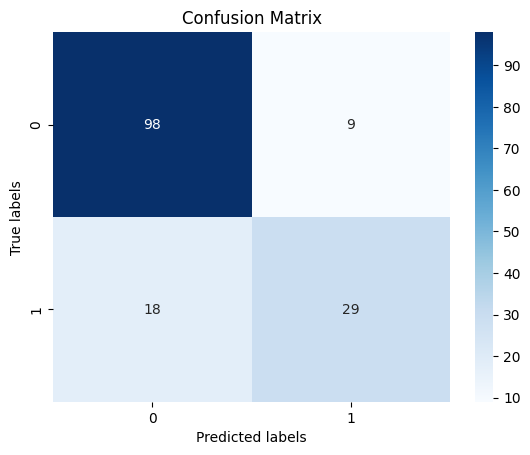

In [48]:
# Problem 1:
# Load the data
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Pre-process the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the logistic regression model
clf = LogisticRegression(max_iter=1000)

# Train the model
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

# Report the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

# Plotting the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
clf = LogisticRegression(solver='saga', max_iter=1, warm_start=True)

iterations = 1000
accuracies = []




(2A) Without weight penalty:
Accuracy:  0.9385964912280702
Precision:  0.9166666666666666
Recall:  0.9361702127659575
F1 Score:  0.9263157894736843


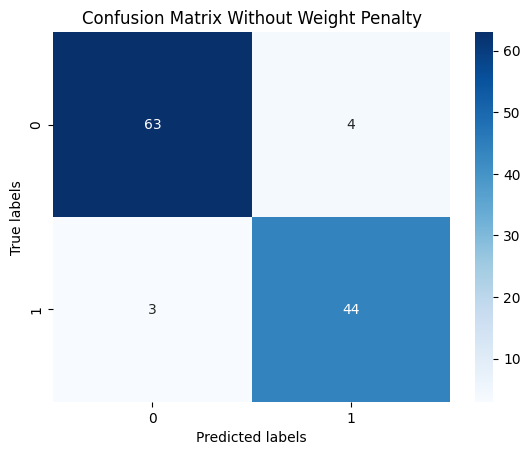

(2B) With weight penalty (No regularization):
Accuracy:  0.9649122807017544
Precision:  0.9574468085106383
Recall:  0.9574468085106383
F1 Score:  0.9574468085106385


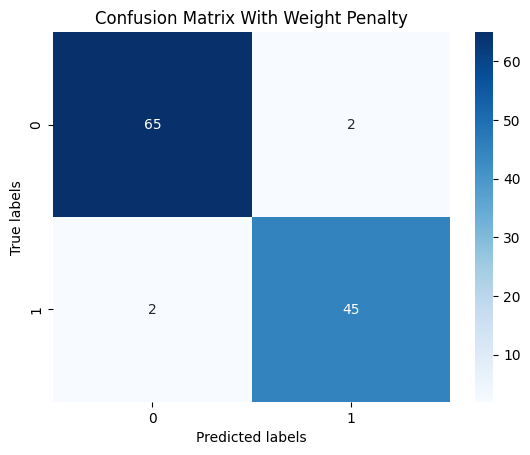

In [39]:
# Problem 2:
# Load the cancer dataset
df_cancer = pd.read_csv('cancer.csv')
df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'M': 1, 'B': 0})
X_cancer = df_cancer.drop('diagnosis', axis=1)
y_cancer = df_cancer['diagnosis']

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_cancer_imputed = imputer.fit_transform(X_cancer)

# Split the dataset
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer_imputed, y_cancer, test_size=0.20, random_state=0)

# Pre-process the data
scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

# Build the logistic regression model (No Penalty)
clf_cancer = LogisticRegression(max_iter=1000, penalty= None)

# Train the model
clf_cancer.fit(X_train_cancer_scaled, y_train_cancer)
y_pred_cancer = clf_cancer.predict(X_test_cancer_scaled)

# Report the results
print("(2A) Without weight penalty:")
print("Accuracy: ", accuracy_score(y_test_cancer, y_pred_cancer))
print("Precision: ", precision_score(y_test_cancer, y_pred_cancer))
print("Recall: ", recall_score(y_test_cancer, y_pred_cancer))
print("F1 Score: ", f1_score(y_test_cancer, y_pred_cancer))

# Plotting the confusion matrix
conf_mat_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)
sns.heatmap(conf_mat_cancer, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Without Weight Penalty')
plt.show()

# (b) With weight penalty (L2 regularization)
clf_cancer_penalty = LogisticRegression(max_iter=1000, penalty='l2')

# Train the model
clf_cancer_penalty.fit(X_train_cancer_scaled, y_train_cancer)
y_pred_cancer_penalty = clf_cancer_penalty.predict(X_test_cancer_scaled)

# Report the results
print("(2B) With weight penalty (No regularization):")
print("Accuracy: ", accuracy_score(y_test_cancer, y_pred_cancer_penalty))
print("Precision: ", precision_score(y_test_cancer, y_pred_cancer_penalty))
print("Recall: ", recall_score(y_test_cancer, y_pred_cancer_penalty))
print("F1 Score: ", f1_score(y_test_cancer, y_pred_cancer_penalty))

# Plotting the confusion matrix
conf_mat_cancer_penalty = confusion_matrix(y_test_cancer, y_pred_cancer_penalty)
sns.heatmap(conf_mat_cancer_penalty, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix With Weight Penalty')
plt.show()

In [40]:
# Problem 3

# Split the dataset
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer_imputed, y_cancer, test_size=0.20, random_state=42)

# Scale the dataset
scaler = StandardScaler()
X_train_cancer = scaler.fit_transform(X_train_cancer)
X_test_cancer = scaler.transform(X_test_cancer)

# Build the naive Bayesian model
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train_cancer, y_train_cancer)
y_pred_cancer = nb_classifier.predict(X_test_cancer)

# Report the classification metrics
print("Classification Accuracy: ", accuracy_score(y_test_cancer, y_pred_cancer))
print("Precision: ", precision_score(y_test_cancer, y_pred_cancer))
print("Recall: ", recall_score(y_test_cancer, y_pred_cancer))
print("F1 Score: ", f1_score(y_test_cancer, y_pred_cancer))

Classification Accuracy:  0.9649122807017544
Precision:  0.975609756097561
Recall:  0.9302325581395349
F1 Score:  0.9523809523809524


In [46]:
# Problem 4

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer_imputed)

# Split the dataset
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer_scaled, y_cancer, test_size=0.20, random_state=0)

# Identify optimum number of K principal components
max_features = X_cancer_scaled.shape[1]
best_accuracy = 0
best_k = 0
best_precision = 0
best_recall = 0
best_f1 = 0

for k in range(1, max_features + 1):
    # Apply PCA and reduce features
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_cancer)
    X_test_pca = pca.transform(X_test_cancer)

    # Train a logistic regression model
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_pca, y_train_cancer)
    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y_test_cancer, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_precision = precision_score(y_test_cancer, y_pred)
        best_recall = recall_score(y_test_cancer, y_pred)
        best_f1 = f1_score(y_test_cancer, y_pred)

print(f"Best K: {best_k}")
print("Accuracy for best K: ", best_accuracy)
print("Precision for best K: ", best_precision)
print("Recall for best K: ", best_recall)
print("F1 Score for best K: ", best_f1)

Best K: 15
Accuracy for best K:  0.9649122807017544
Precision for best K:  0.9574468085106383
Recall for best K:  0.9574468085106383
F1 Score for best K:  0.9574468085106385


In [45]:
# Problem 5
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer_imputed)

# Split the dataset
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer_scaled, y_cancer, test_size=0.20, random_state=0)

# Identify optimum number of K principal components
max_features = X_cancer_scaled.shape[1]
best_accuracy = 0
best_k = 0
best_precision = 0
best_recall = 0
best_f1 = 0

for k in range(1, max_features + 1):
    # Apply PCA and reduce features
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_cancer)
    X_test_pca = pca.transform(X_test_cancer)

    # Train a Naive Bayes classifier
    clf = GaussianNB()  # Creating the Gaussian Naive Bayes classifier
    clf.fit(X_train_pca, y_train_cancer)
    y_pred = clf.predict(X_test_pca)

    accuracy = accuracy_score(y_test_cancer, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_precision = precision_score(y_test_cancer, y_pred)
        best_recall = recall_score(y_test_cancer, y_pred)
        best_f1 = f1_score(y_test_cancer, y_pred)

print(f"Best K: {best_k}")
print("Accuracy for best K: ", best_accuracy)
print("Precision for best K: ", best_precision)
print("Recall for best K: ", best_recall)
print("F1 Score for best K: ", best_f1)

Best K: 5
Accuracy for best K:  0.9298245614035088
Precision for best K:  0.9333333333333333
Recall for best K:  0.8936170212765957
F1 Score for best K:  0.9130434782608695
